Importando bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Carregar o dataset

In [ ]:
df = pd.read_csv('../Concrete Compressive Strength.csv')

In [ ]:
df.sample(10, random_state=11)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
86,362.60,189.00,0.00,164.90,11.60,944.70,755.80,3,35.301171
324,252.31,0.00,98.75,146.25,14.17,987.76,889.01,3,21.780547
786,331.00,0.00,0.00,192.00,0.00,978.00,825.00,28,31.447000
278,251.37,0.00,118.27,188.45,5.75,1028.40,757.73,100,43.581778
353,213.50,0.00,174.24,154.61,11.66,1052.30,775.48,100,59.301831
255,212.52,0.00,100.37,159.32,8.71,1007.80,903.59,14,26.310404
1007,155.60,243.50,0.00,180.30,10.70,1022.00,697.70,28,37.363394
449,172.38,13.61,172.37,156.76,4.14,1006.30,856.40,56,35.852752
340,297.16,0.00,117.54,174.80,9.52,1022.80,753.45,14,36.990387
771,331.00,0.00,0.00,192.00,0.00,978.00,825.00,3,13.520624


Pré-processamento

In [ ]:
# Verificar valores ausentes
print("Valores ausentes por coluna:\n", df.isnull().sum())


Valores ausentes por coluna:
 Cement                            0
Blast Furnace Slag                0
Fly Ash                           0
Water                             0
Superplasticizer                  0
Coarse Aggregate                  0
Fine Aggregate                    0
Age (day)                         0
Concrete compressive strength     0
dtype: int64


In [ ]:
# Se houver valores ausentes, pode-se optar por preencher com a média ou remover
df.fillna(df.mean(), inplace=True)

In [ ]:
# Verificar variáveis categóricas para codificação
cat_cols = df.select_dtypes(include='object').columns
if len(cat_cols) > 0:
    print(f"Colunas categóricas a serem codificadas: {cat_cols}")
    df = pd.get_dummies(df, drop_first=True)

In [ ]:
# Normalização das variáveis numéricas
num_cols = df.select_dtypes(include=np.number).columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

Análise Exploratória de Dados (EDA)

In [ ]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733,2.645192
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733,1.561277
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066,0.266608
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677,0.313515
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487,0.507753


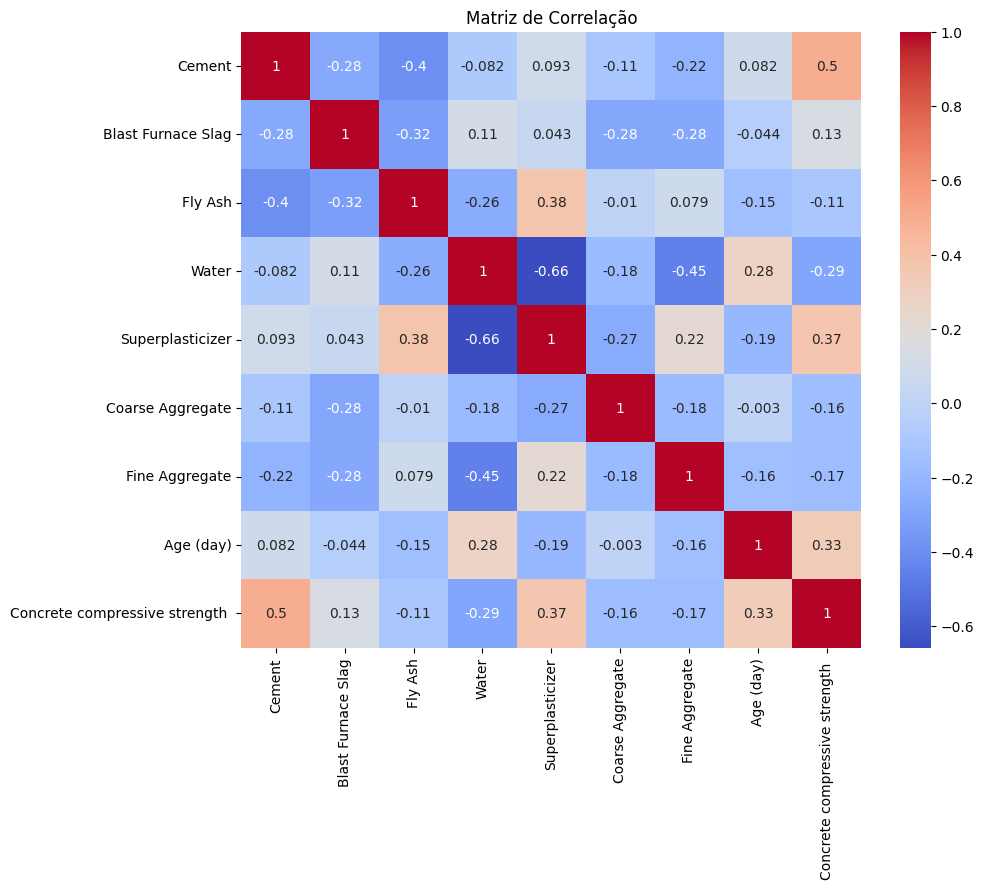

In [ ]:
# Mostrar correlação entre variáveis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

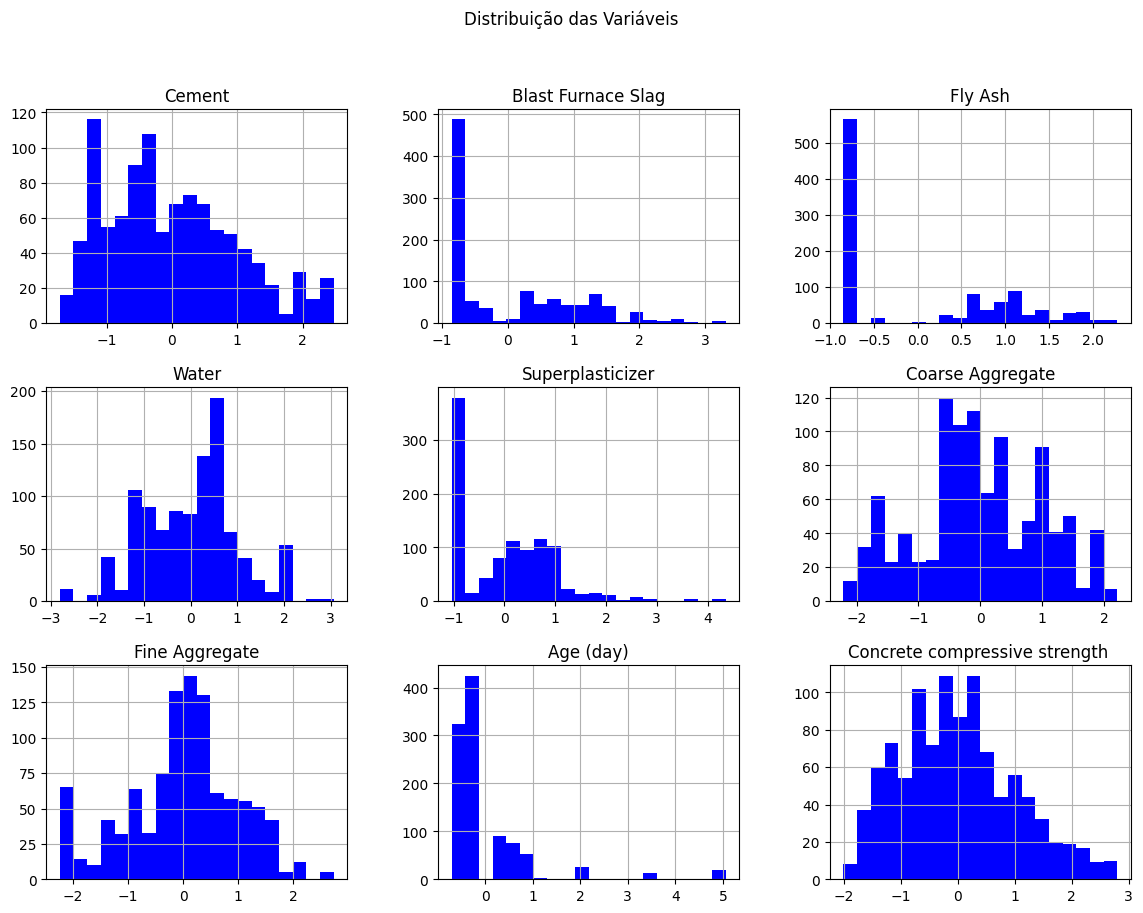

In [ ]:
# Distribuição das variáveis numéricas
df.hist(bins=20, figsize=(14, 10), color='blue')
plt.suptitle("Distribuição das Variáveis")
plt.show()

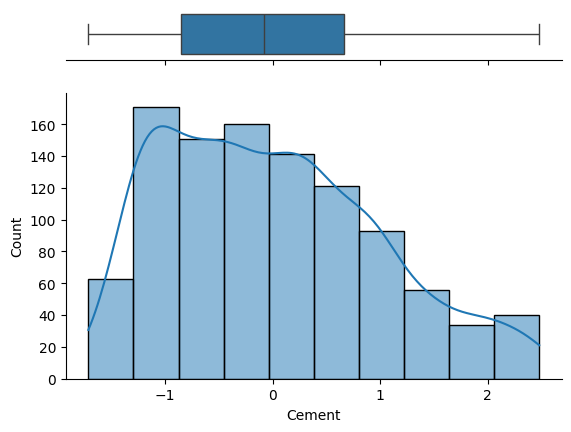

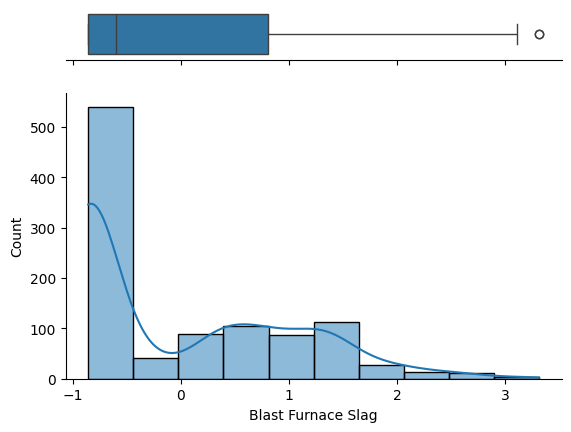

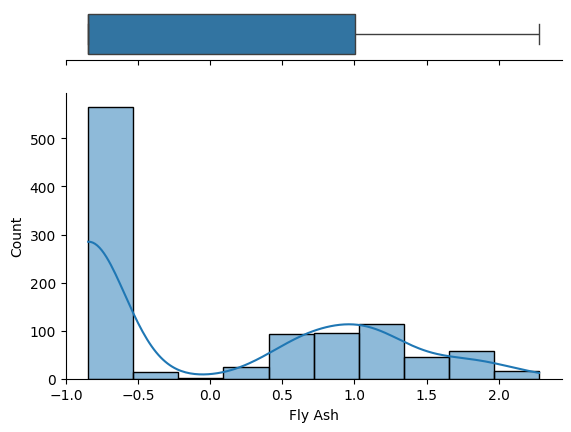

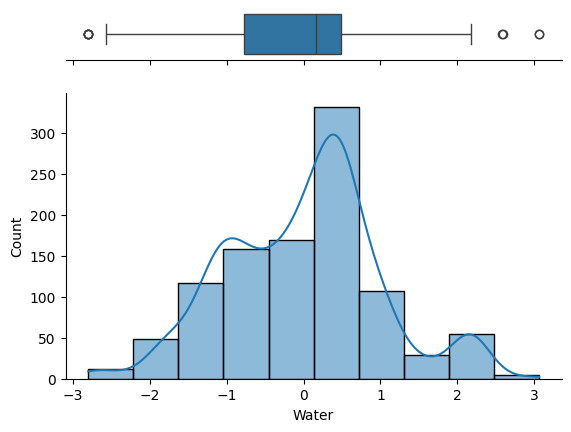

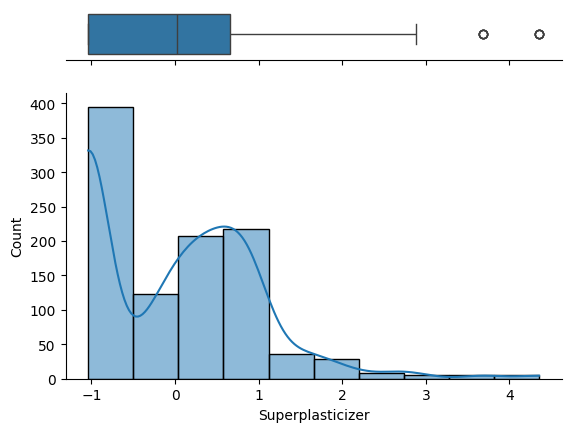

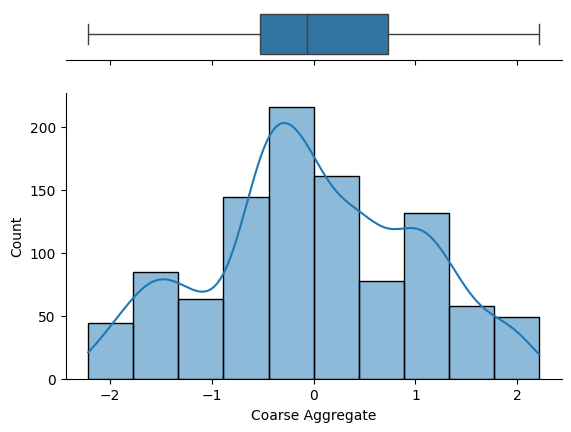

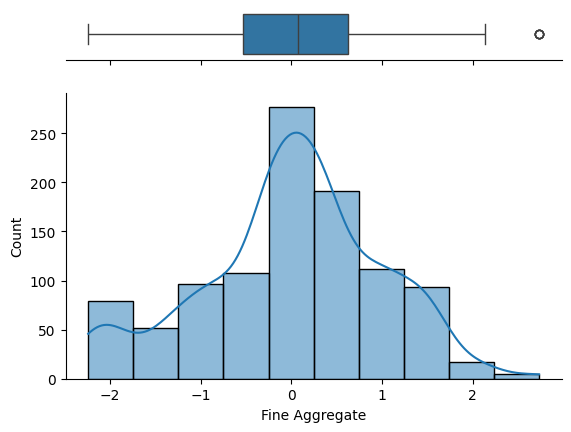

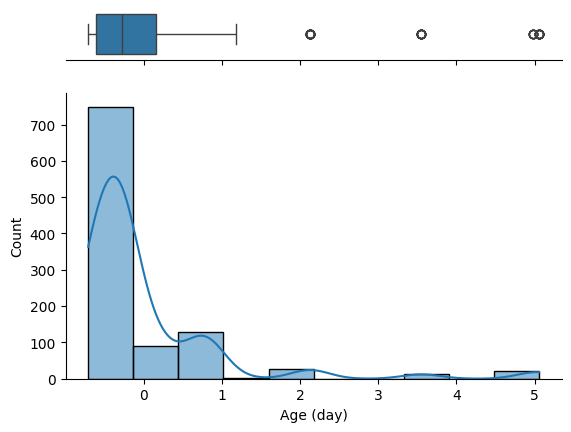

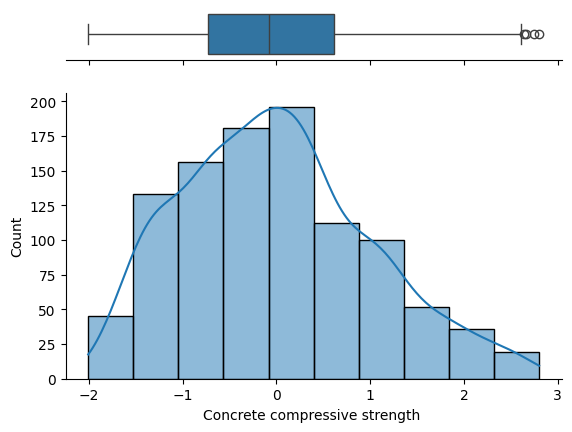

In [ ]:
for column in df:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(x=df[column], ax=ax_box)
    sns.histplot(x=df[column], bins=10, kde=True, ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

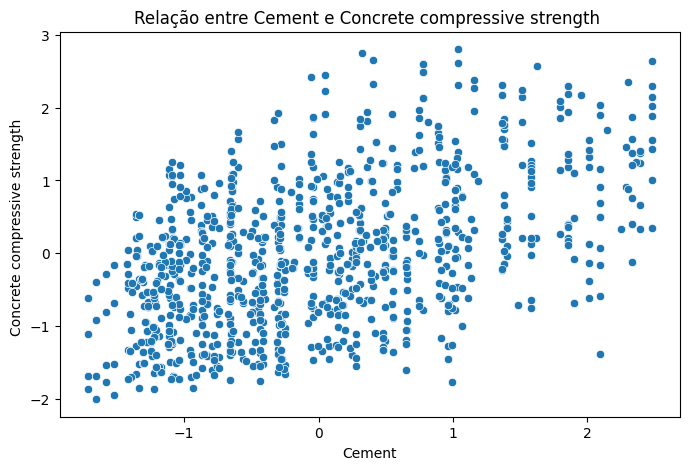

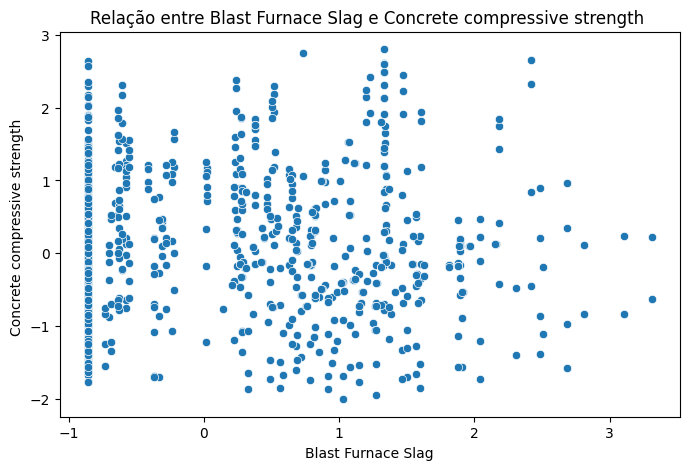

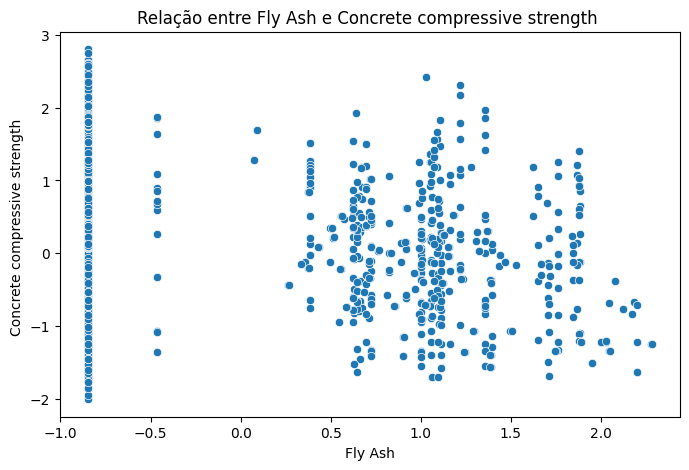

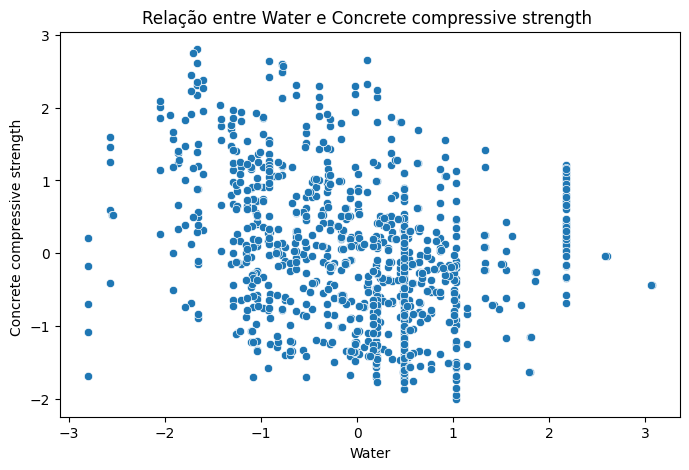

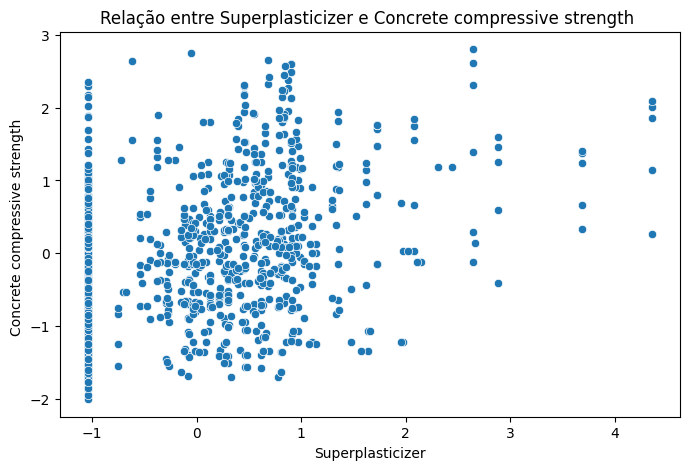

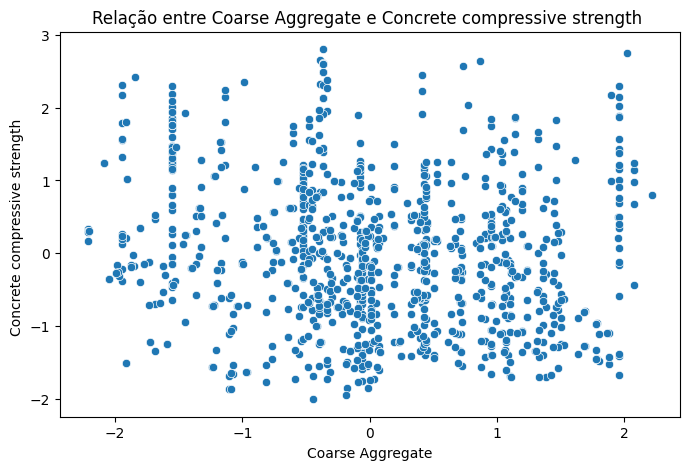

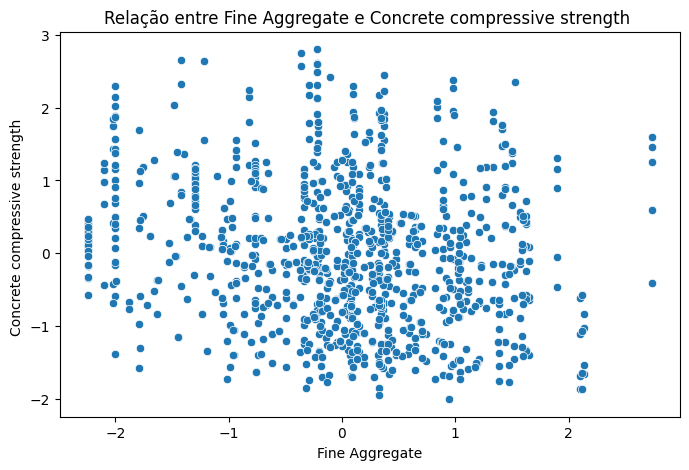

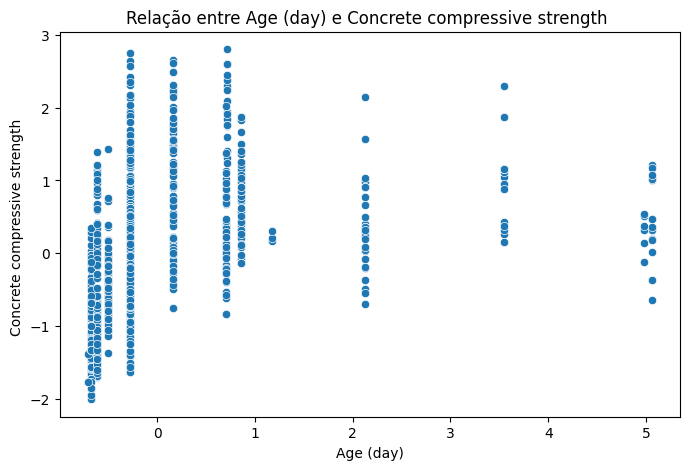

In [ ]:
# Analisando a relação entre a variável-alvo e as demais variáveis
target_col = 'Concrete compressive strength '
for col in num_cols:
    if col != target_col:
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=df[col], y=df[target_col])
        plt.title(f"Relação entre {col} e {target_col}")
        plt.show()

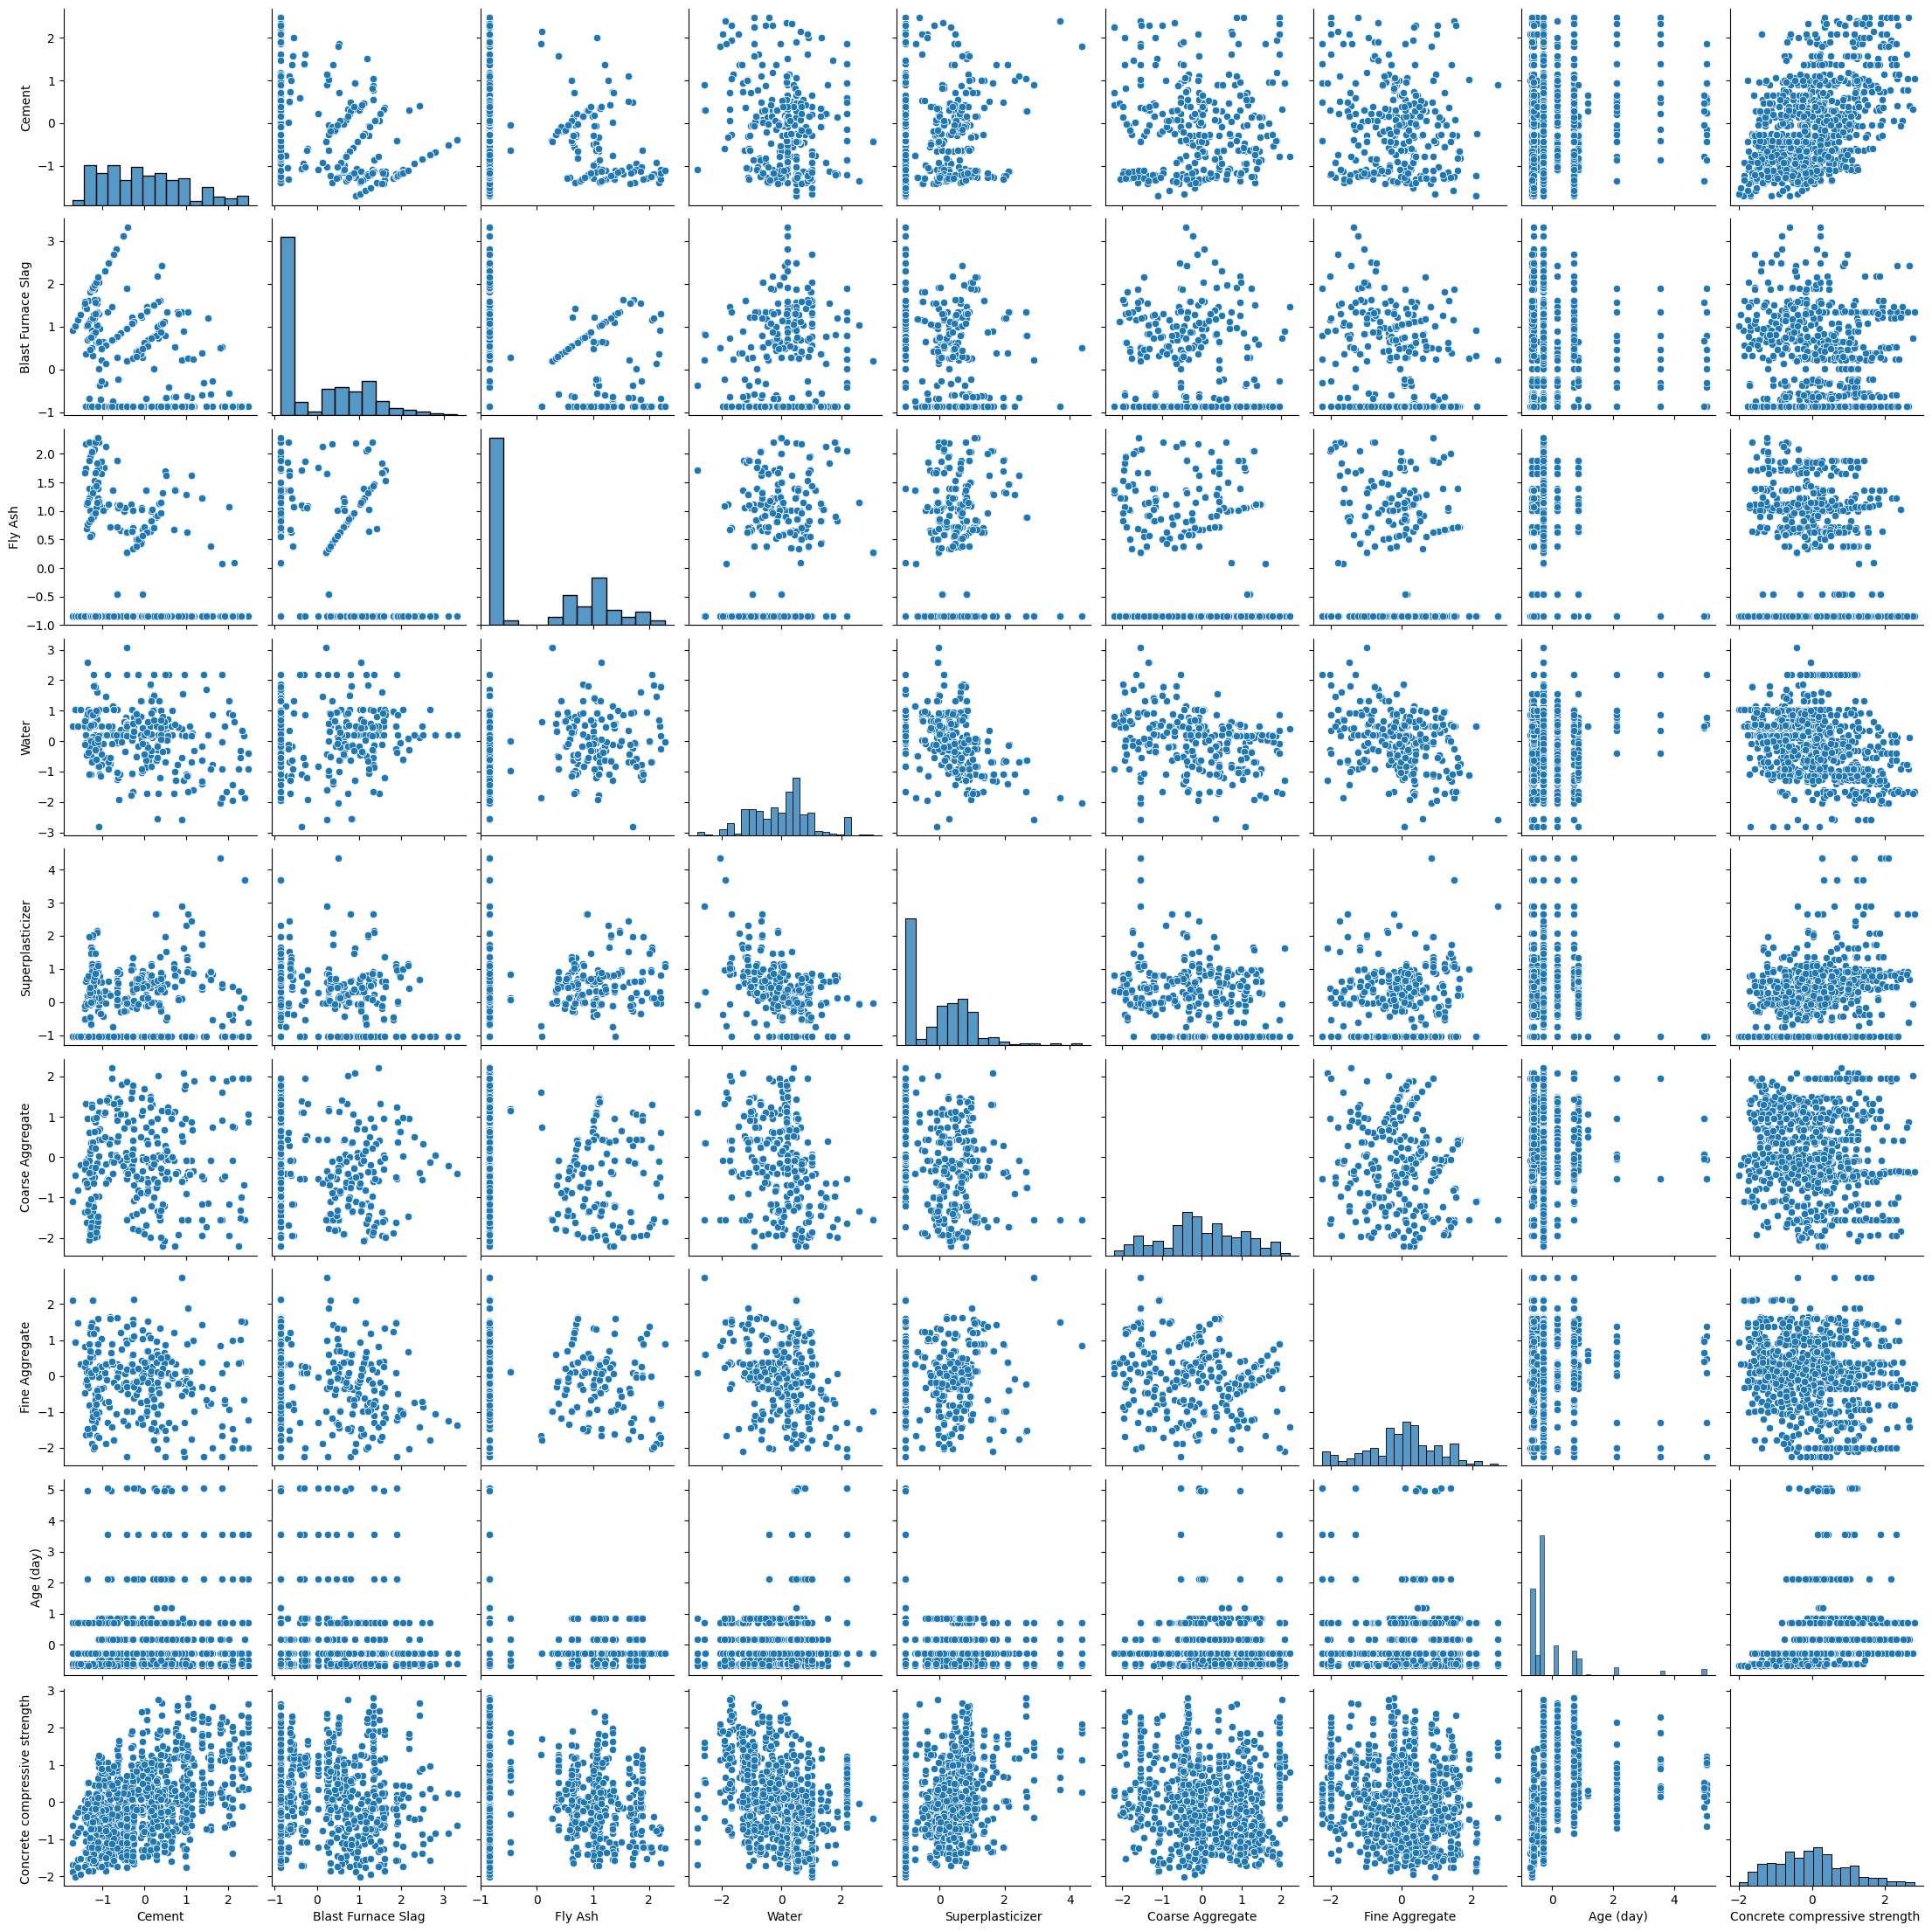

In [ ]:
sns.pairplot(df)

Modelos de Regressão

In [ ]:
# Separar os dados em X (features) e y (target)
X = df.drop(columns=[target_col])
y = df[target_col]

In [ ]:
# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Modelo 1: Regressão Linear
linear_model = Sequential()
linear_model.add(Dense(1, input_dim=X_train.shape[1], activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilar o Modelo
linear_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Treinar o modelo
history = linear_model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.0378 - mae: 1.3954 - val_loss: 2.4776 - val_mae: 1.2617
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9409 - mae: 1.3745 - val_loss: 2.3482 - val_mae: 1.2279
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5772 - mae: 1.2839 - val_loss: 2.2245 - val_mae: 1.1945
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5681 - mae: 1.2780 - val_loss: 2.1050 - val_mae: 1.1615
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1845 - mae: 1.1695 - val_loss: 1.9937 - val_mae: 1.1296
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1509 - mae: 1.1575 - val_loss: 1.8876 - val_mae: 1.0986
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0843 - mae: 1.1502 - val_loss: 1.7872 - val_mae: 1.0691
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0833 - mae: 1.1359 - val_loss: 1.6946 - val_mae: 1.0415
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.89

In [ ]:
# Previsão e Avaliação para Regressão Linear com TensorFlow
lr_pred = linear_model.predict(X_test).flatten()
print("Regressão Linear com TensorFlow:")
print("MSE:", mean_squared_error(y_test, lr_pred))
print("R2 Score:", r2_score(y_test, lr_pred))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Regressão Linear com TensorFlow:
MSE: 0.36200233527090786
R2 Score: 0.6273934812033147


In [ ]:
# Modelo 2: Árvore de Decisão
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [ ]:
# Avaliação Árvore de Decisão
print("\nÁrvore de Decisão:")
print("MSE:", mean_squared_error(y_test, dt_pred))
print("R2 Score:", r2_score(y_test, dt_pred))


Árvore de Decisão:
MSE: 0.1764061177232235
R2 Score: 0.8184263939344512


In [ ]:
# Modelo 3: Redes Neurais
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)

In [ ]:
# Avaliação Redes Neurais
print("\nRedes Neurais:")
print("MSE:", mean_squared_error(y_test, mlp_pred))
print("R2 Score:", r2_score(y_test, mlp_pred))


Redes Neurais:
MSE: 0.11006685481728863
R2 Score: 0.8867089418700058


Apresentação dos Resultados

In [ ]:
# Apresentação dos Resultados
model_results = pd.DataFrame({
    "Modelo": ["Regressão Linear (TensorFlow)", "Árvore de Decisão", "Redes Neurais"],
    "MSE": [mean_squared_error(y_test, lr_pred),
            mean_squared_error(y_test, dt_pred),
            mean_squared_error(y_test, mlp_pred)],
    "R2 Score": [r2_score(y_test, lr_pred),
                 r2_score(y_test, dt_pred),
                 r2_score(y_test, mlp_pred)]
})

print("\nComparação dos Modelos:")
print(model_results)


Comparação dos Modelos:
                          Modelo       MSE  R2 Score
0  Regressão Linear (TensorFlow)  0.362002  0.627393
1              Árvore de Decisão  0.176406  0.818426
2                  Redes Neurais  0.110067  0.886709
